<a href="https://colab.research.google.com/github/YB-8080/miniproject_258723G/blob/main/Final_prj_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
file_path = "/content/data/tomato irrigation dataset.csv"
df = pd.read_csv(file_path)

print("\nDataset Info:")
df.info()

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nSummary statistics:")
print(df.describe())

print("\nColumn names and their data types:")
print(df.dtypes)

print("\nNumber of rows and columns:")
print(df.shape)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature [_ C]             3000 non-null   float64
 1   Humidity [%]                  3000 non-null   float64
 2   Soil moisture                 3000 non-null   float64
 3   Reference evapotranspiration  3000 non-null   float64
 4   Evapotranspiration            3000 non-null   float64
 5   Crop Coefficient              3000 non-null   float64
 6   Crop Coefficient stage        3000 non-null   object 
 7   Nitrogen [mg/kg]              3000 non-null   int64  
 8   Phosphorus [mg/kg]            3000 non-null   int64  
 9   Potassium                     3000 non-null   int64  
 10  Solar Radiation ghi           3000 non-null   float64
 11  Wind Speed                    3000 non-null   float64
 12  Days of planted               3000 non-null   i

Code for find the missing value

In [4]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Temperature [_ C]               0
Humidity [%]                    0
Soil moisture                   0
Reference evapotranspiration    0
Evapotranspiration              0
Crop Coefficient                0
Crop Coefficient stage          0
Nitrogen [mg/kg]                0
Phosphorus [mg/kg]              0
Potassium                       0
Solar Radiation ghi             0
Wind Speed                      0
Days of planted                 0
pH                              0
dtype: int64


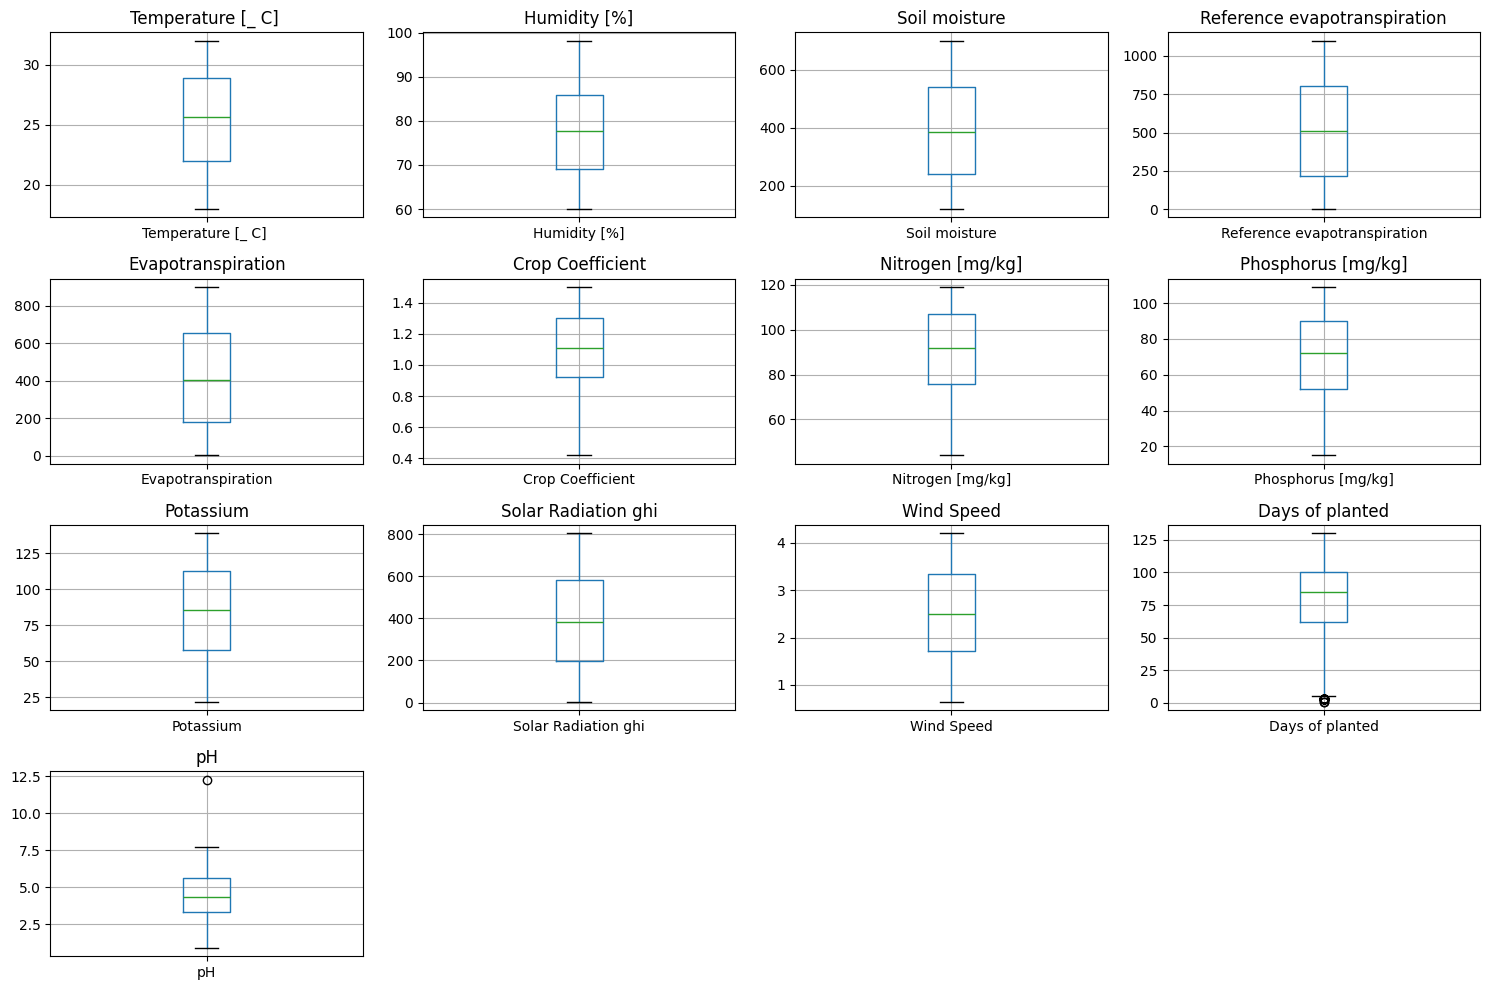

In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns

#Select numerical columns and create box plots to visualize potential outliers.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
#Calculate Z-scores and identify outliers using a threshold.
outlier_indices_zscore = {}
for col in numerical_cols:
    z_scores = np.abs(zscore(df[col]))
    outlier_indices = df[z_scores > 3].index
    outlier_indices_zscore[col] = outlier_indices

print("Potential outliers identified by Z-score (threshold=3):")
for col, indices in outlier_indices_zscore.items():
    if len(indices) > 0:
        print(f"Column '{col}': {list(indices)}")

Potential outliers identified by Z-score (threshold=3):
Column 'pH': [226]


outlier handling Using Cap method

In [12]:
outlier_strategy = {
    'pH': 'cap'
}

for col, strategy in outlier_strategy.items():
    if col in outlier_indices_zscore and len(outlier_indices_zscore[col]) > 0:
       if strategy == 'cap':
            upper_limit = df[col].mean() + 3 * df[col].std()
            lower_limit = df[col].mean() - 3 * df[col].std()
            df[col] = np.where(df[col] > upper_limit, upper_limit,
                               np.where(df[col] < lower_limit, lower_limit, df[col]))
            print(f"Capped outliers in column '{col}'.")
display(df.head())

Capped outliers in column 'pH'.


,Temperature [_ C],Humidity [%],Soil moisture,Reference evapotranspiration,Evapotranspiration,Crop Coefficient,Crop Coefficient stage,Nitrogen [mg/kg],Phosphorus [mg/kg],Potassium,Solar Radiation ghi,Wind Speed,Days of planted,pH,Nitrogen [mg/kg]_DaysPlanted_KMeans_Cluster,Phosphorus [mg/kg]_DaysPlanted_KMeans_Cluster,Potassium_DaysPlanted_KMeans_Cluster
0,31.2,93.6,567.0,563.000086,236.460036,0.42,Initial Stage,107,38,53,622.0,2.09,1,3.32,2.0,2.0,2.0
1,31.2,93.6,567.0,561.176578,235.694163,0.42,Initial Stage,107,38,53,622.0,2.09,1,3.77,2.0,2.0,2.0
2,30.5,74.6,307.0,561.267170,235.732211,0.42,Initial Stage,107,38,53,622.0,2.09,3,2.90,2.0,2.0,2.0
3,30.4,76.6,308.0,559.447778,234.968067,0.42,Initial Stage,107,38,53,622.0,2.09,3,7.71,2.0,2.0,2.0
4,30.4,76.6,308.0,559.447778,234.968067,0.42,Initial Stage,107,38,53,622.0,2.09,3,5.11,2.0,2.0,2.0


Check if the outliers have been effectively handled

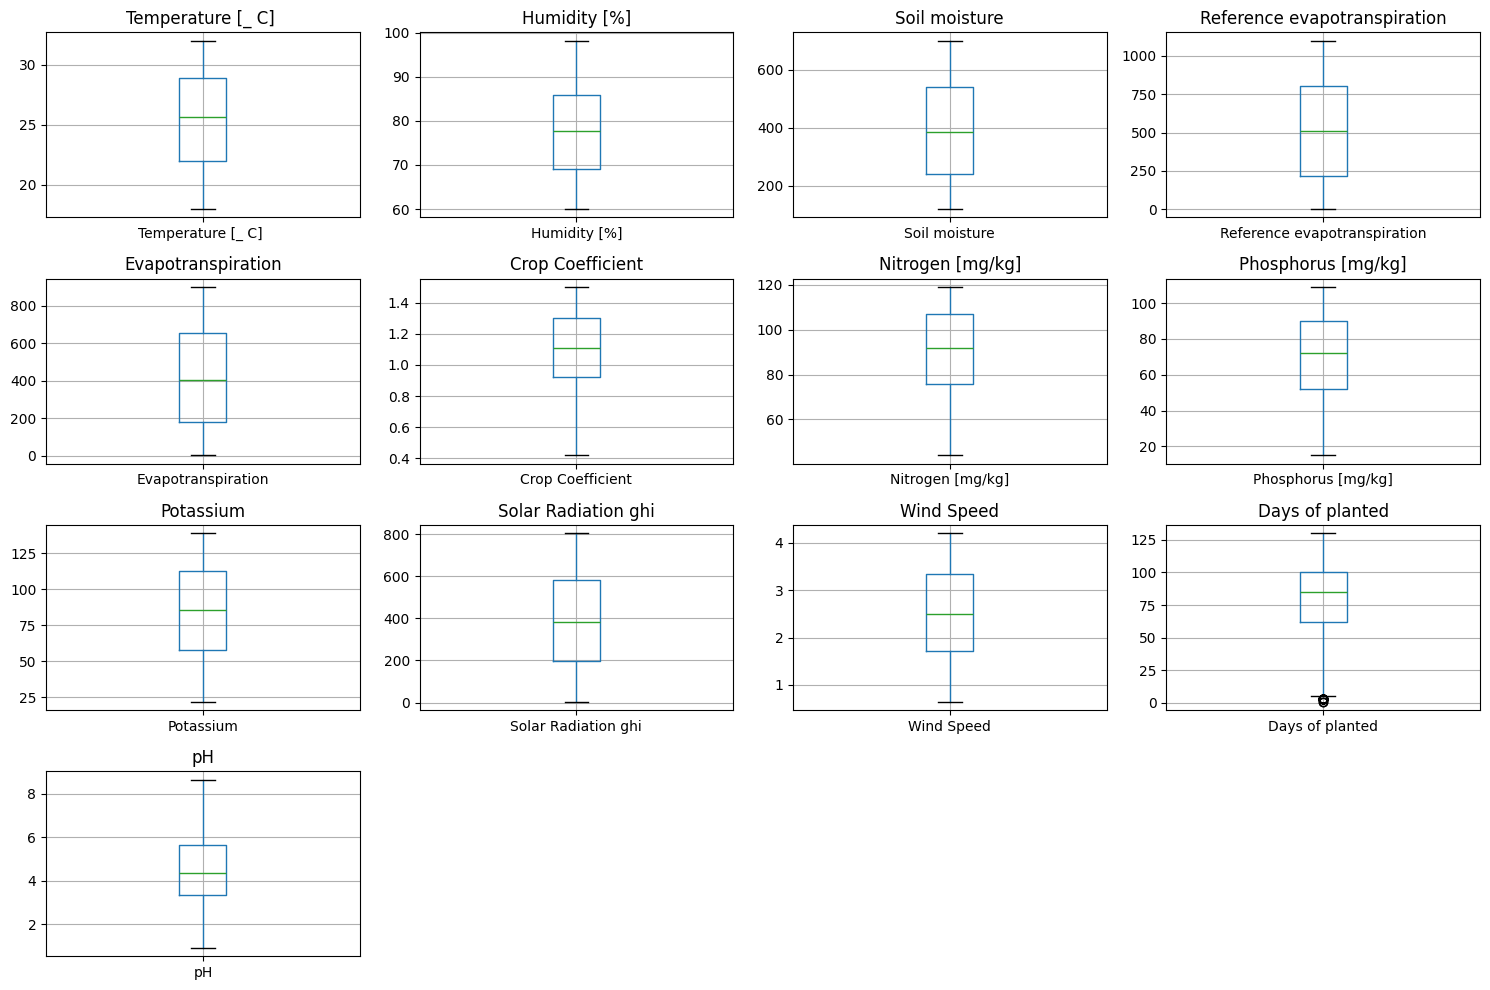

Potential outliers identified by Z-score (threshold=3) after handling:
Column 'pH': [226]


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    df.boxplot(column=col)
    plt.title(col)

plt.tight_layout()
plt.show()

from scipy.stats import zscore

z_scores = np.abs(zscore(df[numerical_cols]))
outlier_indices_zscore = {}
for col in numerical_cols:
    outlier_indices = df[np.abs(zscore(df[col])) > 3].index
    outlier_indices_zscore[col] = outlier_indices

print("Potential outliers identified by Z-score (threshold=3) after handling:")
for col, indices in outlier_indices_zscore.items():
    if len(indices) > 0:
        print(f"Column '{col}': {list(indices)}")

Generate Scatter plots to visualize the relationship between each nutrient level ('Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', and 'Potassium') and 'Days of planted

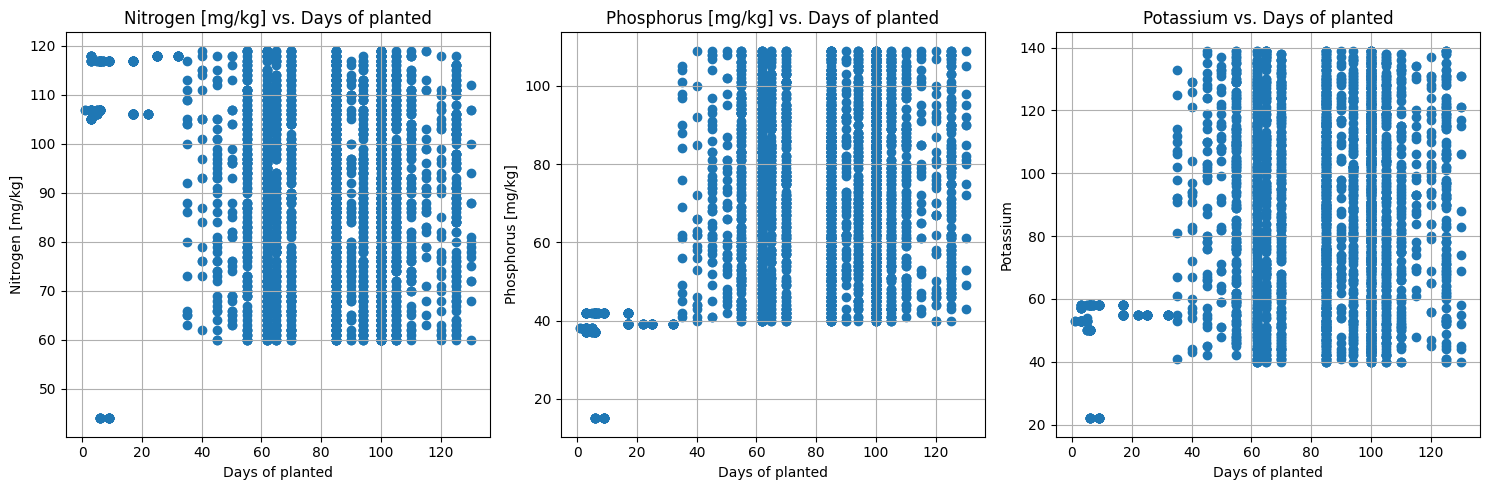

In [9]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']

plt.figure(figsize=(15, 5))

for i, col in enumerate(nutrient_cols):
    plt.subplot(1, 3, i + 1)
    plt.scatter(df['Days of planted'], df[col]) # Changed to plt.scatter for scatter plot
    plt.xlabel('Days of planted')
    plt.ylabel(col)
    plt.title(f'{col} vs. Days of planted')
    plt.grid(True)

plt.tight_layout()
plt.show()

Use the Elbow Method Nutrient clusters

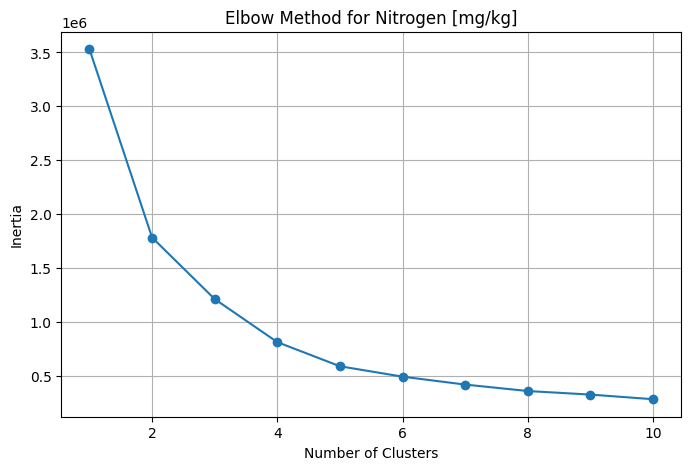

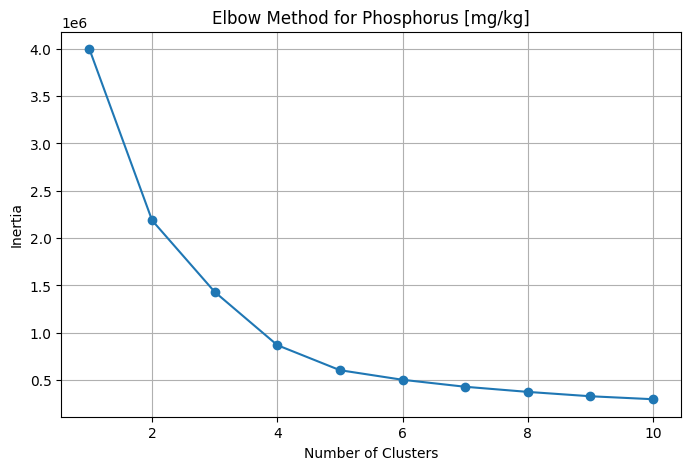

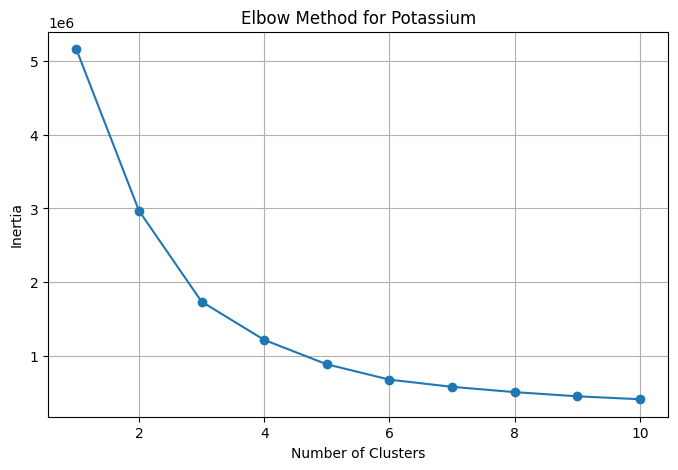

In [10]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']
max_clusters = 10

for col in nutrient_cols:
    X = df[['Days of planted', col]].dropna().values

    if len(X) > 0:
        inertia = []
        for n_clusters in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            kmeans.fit(X)
            inertia.append(kmeans.inertia_)

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_clusters + 1), inertia, marker='o')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Inertia')
        plt.title(f'Elbow Method for {col}')
        plt.grid(True)
        plt.show()
    else:
        plt.figure(figsize=(8, 5))
        plt.text(0.5, 0.5, "No data to cluster", horizontalalignment='center', verticalalignment='center')
        plt.title(f'Elbow Method for {col}')
        plt.show()

Apply K-means clustering to each nutrient level vs. 'Days of planted' plot and visualize the clusters.

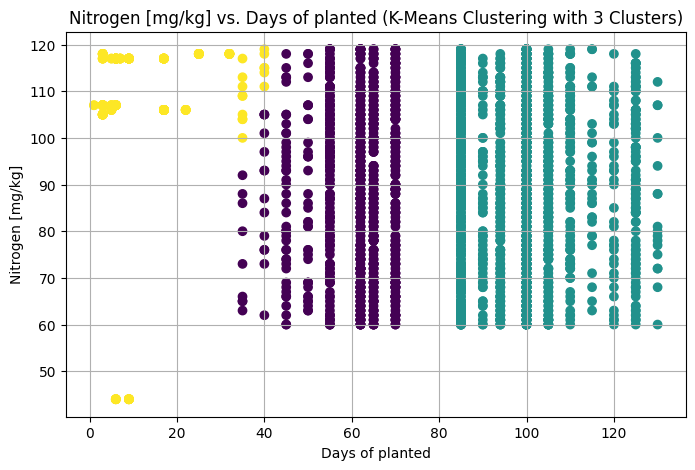

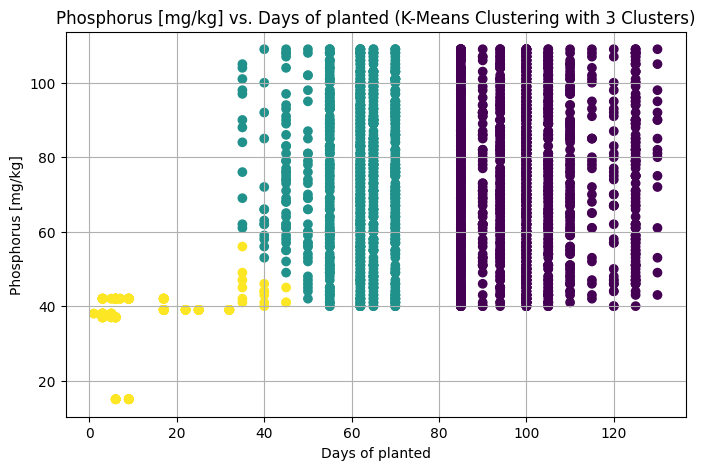

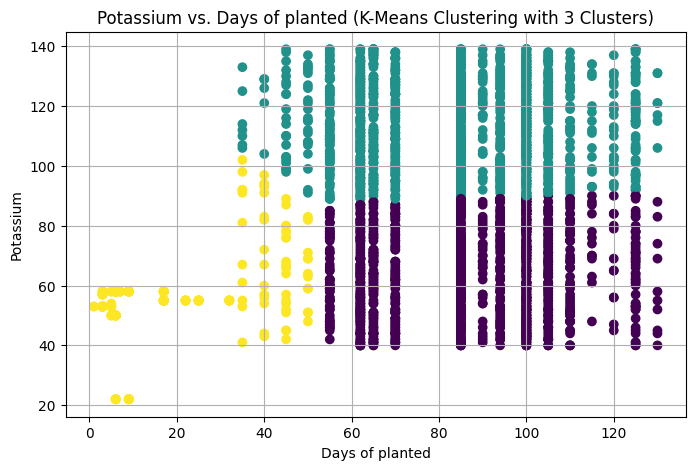

In [11]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']
n_clusters = {
    'Nitrogen [mg/kg]': 3,
    'Phosphorus [mg/kg]': 3,
    'Potassium': 3
}


for i, col in enumerate(nutrient_cols):
    X = df[['Days of planted', col]].dropna().values

    if len(X) > 0:
        kmeans = KMeans(n_clusters=n_clusters[col], random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X)

        # Add cluster labels to the DataFrame
        cluster_col_name = f'{col}_DaysPlanted_KMeans_Cluster'
        # Align the cluster labels with the original DataFrame indices
        df.loc[df[['Days of planted', col]].dropna().index, cluster_col_name] = clusters


        plt.figure(figsize=(8, 5))
        plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
        plt.xlabel('Days of planted')
        plt.ylabel(col)
        plt.title(f'{col} vs. Days of planted (K-Means Clustering with {n_clusters[col]} Clusters)')
        plt.grid(True)
        plt.show()
    else:
        plt.figure(figsize=(8, 5))
        plt.text(0.5, 0.5, "No data to cluster", horizontalalignment='center', verticalalignment='center')
        plt.title(f'{col} vs. Days of planted (K-Means Clustering)')
        plt.show()

clustering evaluation metrics and calculate them for each nutrient based on the previously generated K-means clusters.

In [14]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']

for col in nutrient_cols:
    cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'


    if cluster_col in df.columns:

        X = df[['Days of planted', col]].dropna().values

        cluster_labels = df[cluster_col].dropna()


        if len(X) > 1 and len(set(cluster_labels)) > 1:
            print(f"Evaluating cluster quality for '{col}' vs. 'Days of planted':")

            try:
                silhouette_avg = silhouette_score(X, cluster_labels)


                print(f"  Silhouette Score: {silhouette_avg:.4f}")

            except ValueError as e:
                print(f"  Could not calculate metrics: {e}")
        elif len(X) <= 1:
            print(f"Not enough data points to calculate metrics for '{col}' vs. 'Days of planted'.")
        else:
             print(f"Only one cluster found for '{col}' vs. 'Days of planted', metrics cannot be calculated.")
    else:
        print(f"Cluster column '{cluster_col}' not found in the DataFrame.")

    print("-" * 50)

Evaluating cluster quality for 'Nitrogen [mg/kg]' vs. 'Days of planted':
  Silhouette Score: 0.4441
--------------------------------------------------
Evaluating cluster quality for 'Phosphorus [mg/kg]' vs. 'Days of planted':
  Silhouette Score: 0.4227
--------------------------------------------------
Evaluating cluster quality for 'Potassium' vs. 'Days of planted':
  Silhouette Score: 0.4463
--------------------------------------------------


visualize the clusters and their distribution

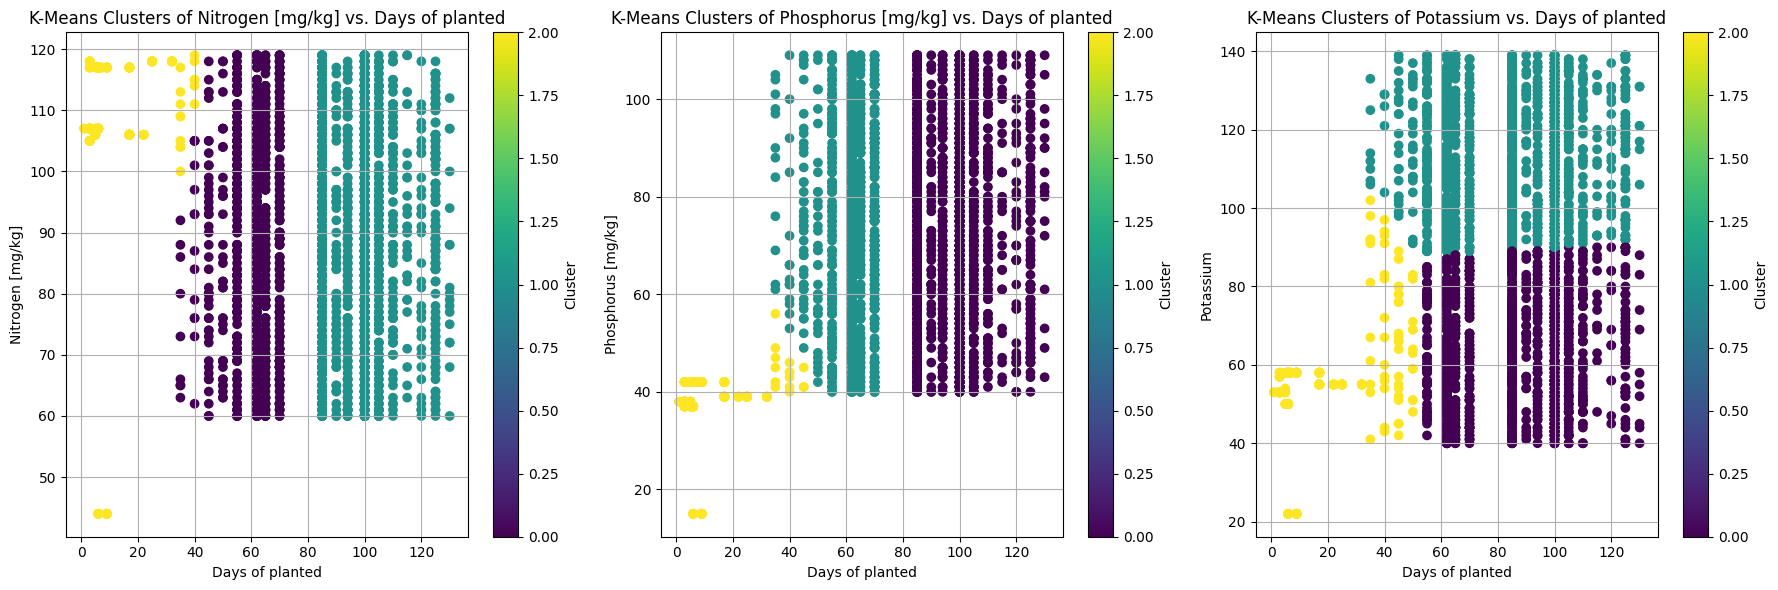

In [15]:
import matplotlib.pyplot as plt

nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']

plt.figure(figsize=(18, 6))

for i, col in enumerate(nutrient_cols):
    cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'
    if cluster_col in df.columns:
        plt.subplot(1, 3, i + 1)
        plt.scatter(df['Days of planted'], df[col], c=df[cluster_col], cmap='viridis')
        plt.xlabel('Days of planted')
        plt.ylabel(col)
        plt.title(f'K-Means Clusters of {col} vs. Days of planted')
        plt.colorbar(label='Cluster')
        plt.grid(True)
    else:
        print(f"Cluster column '{cluster_col}' not found in the DataFrame.")

plt.tight_layout()
plt.show()

Analyze characteristics of each cluster using descriptive statistics

In [16]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']

for col in nutrient_cols:
    cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'
    if cluster_col in df.columns:
        print(f"Descriptive statistics for clusters of '{col}' vs. 'Days of planted':")


        grouped_stats = df.groupby(cluster_col)[['Days of planted', col]].agg(['mean', 'median', 'std'])

        display(grouped_stats)
        print("-" * 50)
    else:
        print(f"Cluster column '{cluster_col}' not found in the DataFrame.")
        print("-" * 50)

Descriptive statistics for clusters of 'Nitrogen [mg/kg]' vs. 'Days of planted':


Days of planted                    \
                                                       mean median        std   
Nitrogen [mg/kg]_DaysPlanted_KMeans_Cluster                                     
0.0                                               61.103104   62.0   7.558680   
1.0                                               99.089315  100.0  11.361254   
2.0                                               12.326007    9.0   9.679038   

                                            Nitrogen [mg/kg]                    
                                                        mean median        std  
Nitrogen [mg/kg]_DaysPlanted_KMeans_Cluster                                     
0.0                                                89.079823   89.5  17.507451  
1.0                                                89.735342   90.0  17.213239  
2.0                                               107.725275  109.0  17.299098

--------------------------------------------------
Descriptive statistics for clusters of 'Phosphorus [mg/kg]' vs. 'Days of planted':


Days of planted         \
                                                         mean median   
Phosphorus [mg/kg]_DaysPlanted_KMeans_Cluster                          
0.0                                                 99.089315  100.0   
1.0                                                 61.069845   62.0   
2.0                                                 12.435897    9.0   

                                                         Phosphorus [mg/kg]  \
                                                     std               mean   
Phosphorus [mg/kg]_DaysPlanted_KMeans_Cluster                                 
0.0                                            11.361254          74.675068   
1.0                                             7.651003          75.512195   
2.0                                             9.988804          38.534799   

                                                                 
                                              median        std  
Phosphorus [mg/kg]_DaysPlanted_KMeans_Cluster                    
0.0                                             75.0  20.200208  
1.0                                             76.0  19.986937  
2.0                                             39.0   6.497714

--------------------------------------------------
Descriptive statistics for clusters of 'Potassium' vs. 'Days of planted':


Days of planted                    \
                                                mean median        std   
Potassium_DaysPlanted_KMeans_Cluster                                     
0.0                                        88.548666   94.0  18.821890   
1.0                                        86.020597   90.0  21.043401   
2.0                                        16.949686    9.0  14.589568   

                                       Potassium                    
                                            mean median        std  
Potassium_DaysPlanted_KMeans_Cluster                                
0.0                                    64.179749   64.0  14.405088  
1.0                                   114.331676  114.0  14.152186  
2.0                                    56.198113   55.0  12.328383

--------------------------------------------------


Create box plots to visualize the distribution of 'Days of planted' and nutrient levels across the clusters

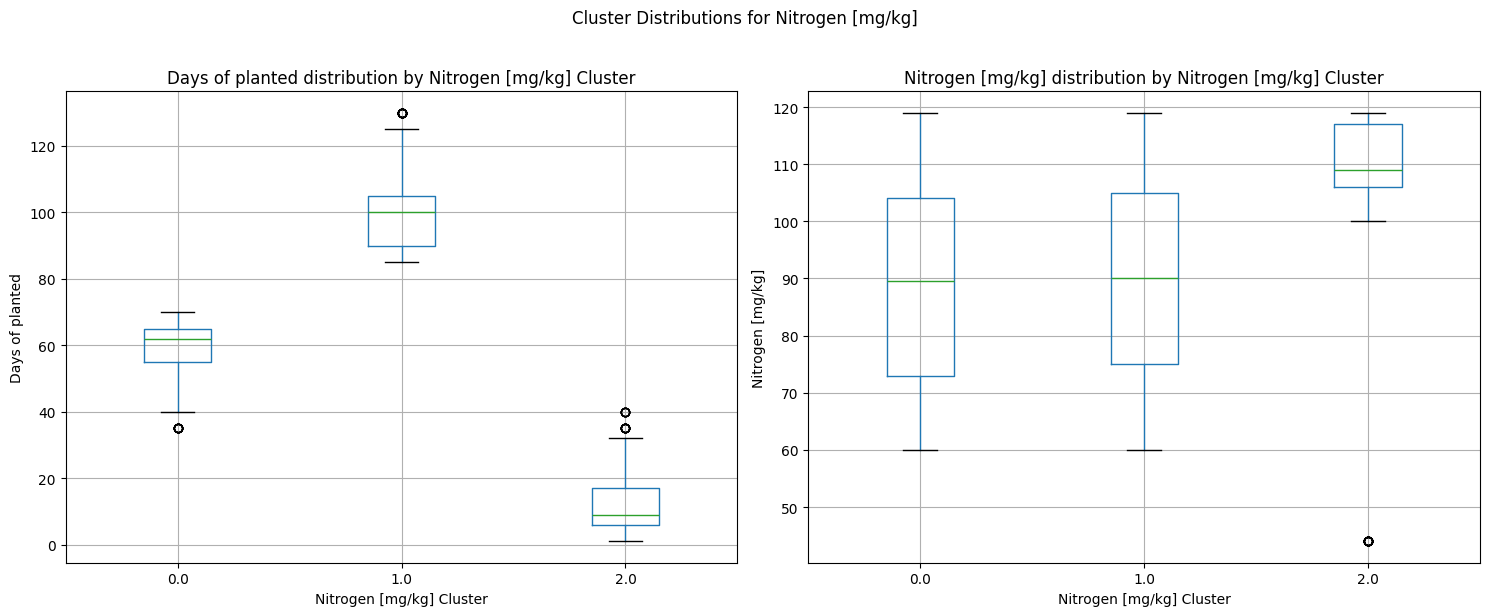

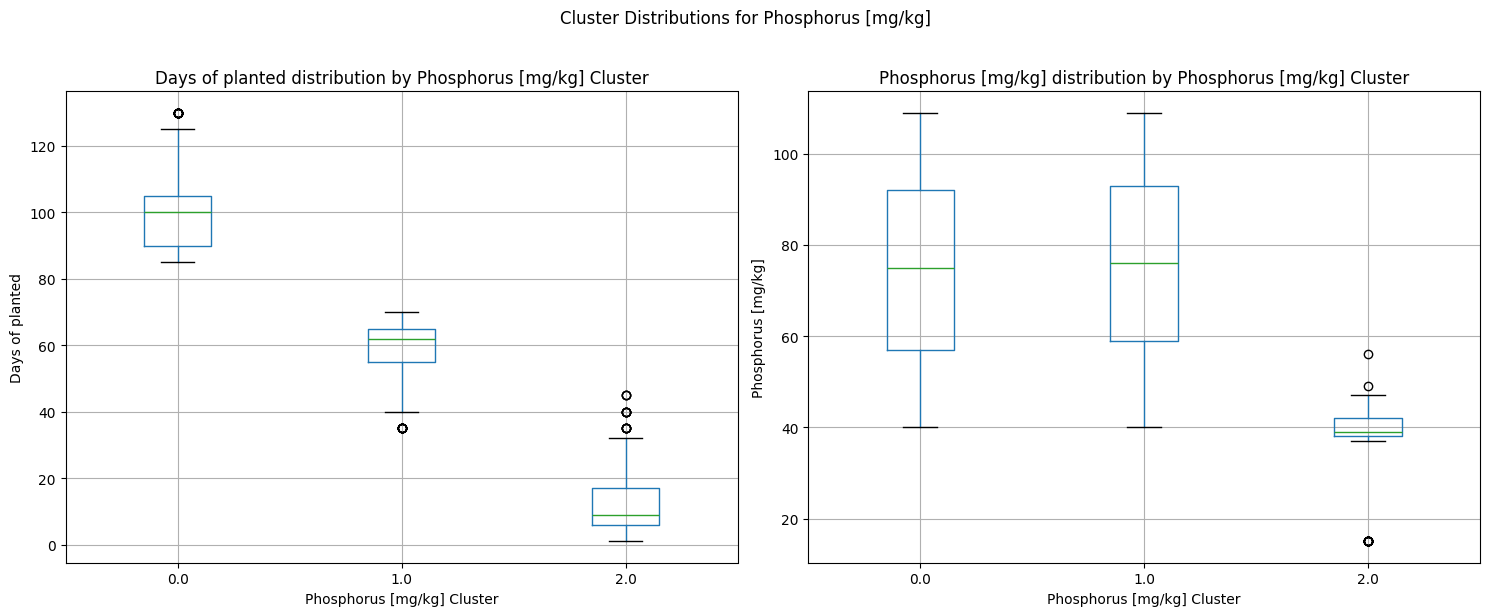

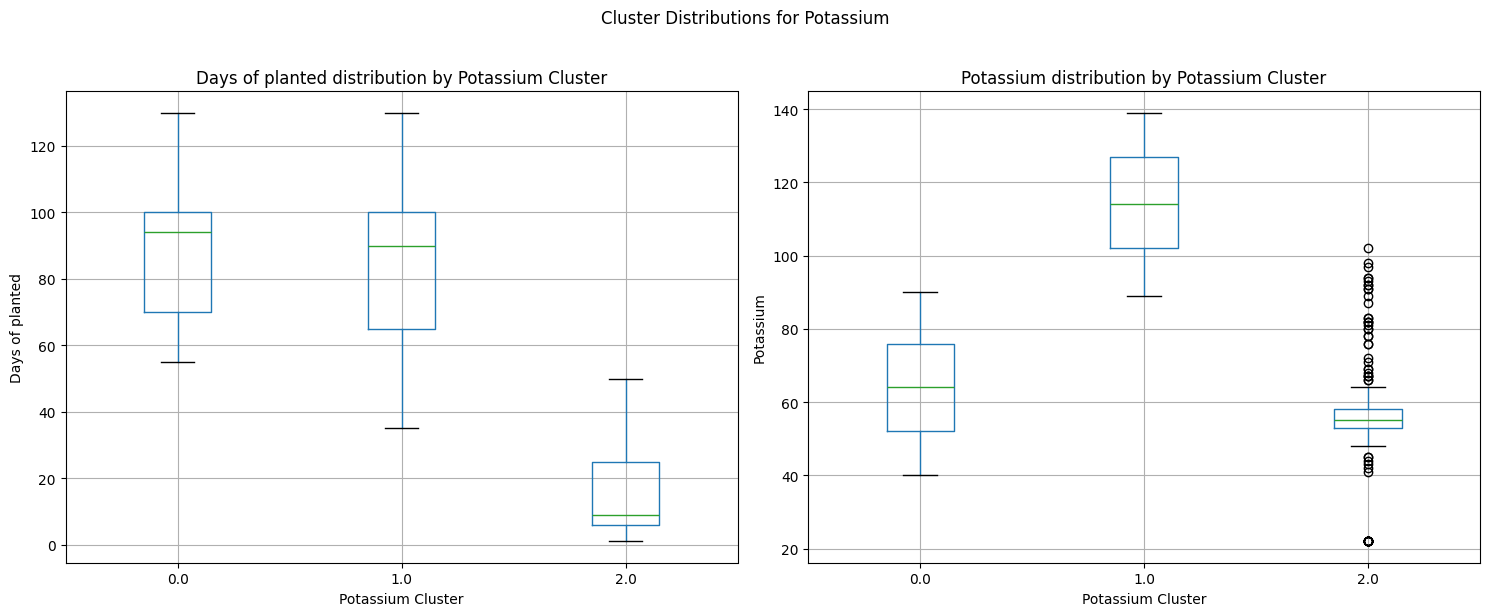

In [17]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']

for col in nutrient_cols:
    cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'
    if cluster_col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        df.boxplot(column='Days of planted', by=cluster_col, ax=axes[0])
        axes[0].set_title(f'Days of planted distribution by {col} Cluster')
        axes[0].set_xlabel(f'{col} Cluster')
        axes[0].set_ylabel('Days of planted')

        df.boxplot(column=col, by=cluster_col, ax=axes[1])
        axes[1].set_title(f'{col} distribution by {col} Cluster')
        axes[1].set_xlabel(f'{col} Cluster')
        axes[1].set_ylabel(col)

        plt.suptitle(f'Cluster Distributions for {col}', y=1.02)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Cluster column '{cluster_col}' not found in the DataFrame.")

Analyzing trends

Analyzing trends for 'Nitrogen [mg/kg]' across clusters:


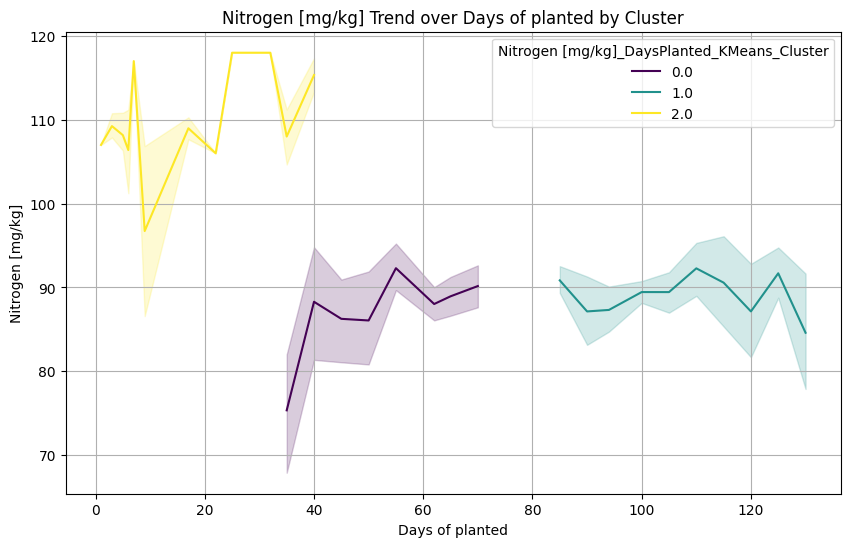

--------------------------------------------------
Analyzing trends for 'Phosphorus [mg/kg]' across clusters:


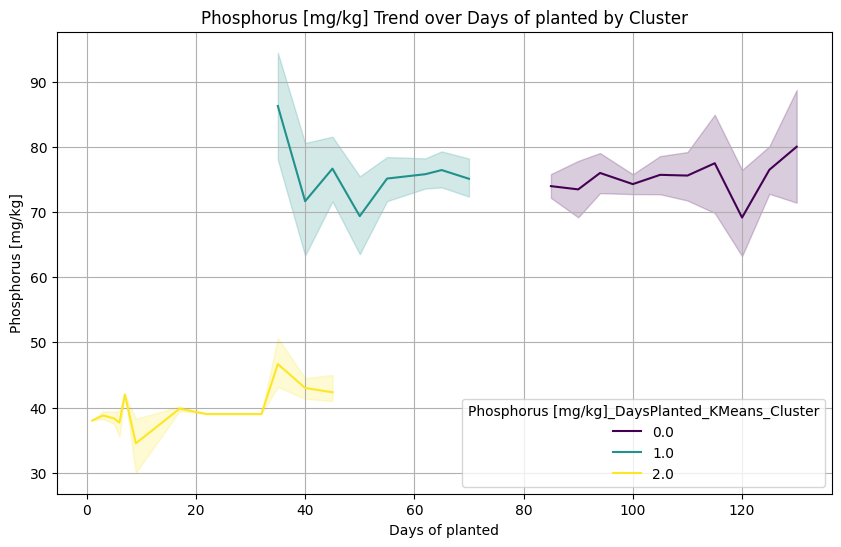

--------------------------------------------------
Analyzing trends for 'Potassium' across clusters:


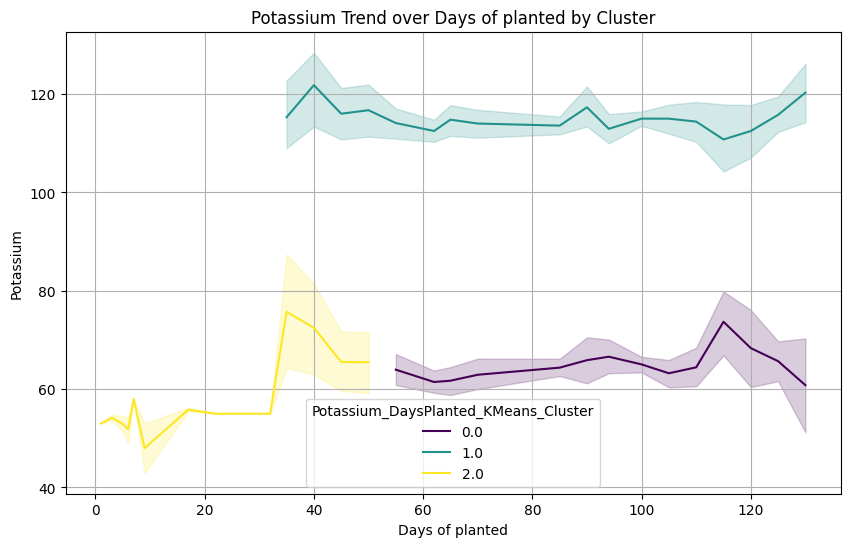

--------------------------------------------------


In [18]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']

for col in nutrient_cols:
    cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'
    if cluster_col in df.columns:
        print(f"Analyzing trends for '{col}' across clusters:")

        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df, x='Days of planted', y=col, hue=cluster_col, palette='viridis')
        plt.title(f'{col} Trend over Days of planted by Cluster')
        plt.xlabel('Days of planted')
        plt.ylabel(col)
        plt.grid(True)
        plt.show()
    else:
        print(f"Cluster column '{cluster_col}' not found in the DataFrame.")
    print("-" * 50)

Analyzing 'Crop Coefficient stage' distribution within nutrients' clusters

Analyzing 'Crop Coefficient stage' distribution within 'Nitrogen [mg/kg]' clusters:
--------------------------------------------------
Analyzing 'Crop Coefficient stage' distribution within 'Phosphorus [mg/kg]' clusters:
--------------------------------------------------
Analyzing 'Crop Coefficient stage' distribution within 'Potassium' clusters:
--------------------------------------------------


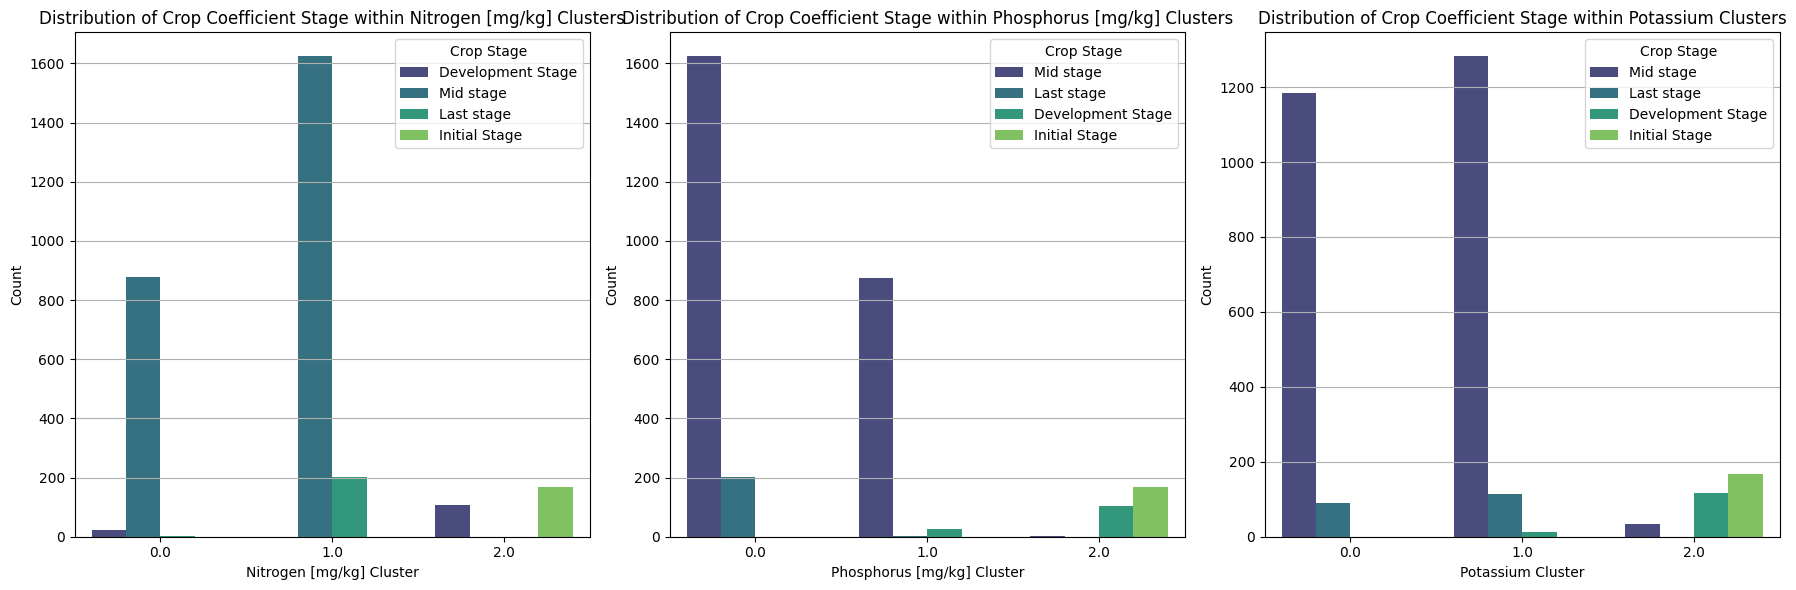

In [19]:
nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']
crop_stage_col = 'Crop Coefficient stage'

if crop_stage_col in df.columns:
    fig, axes = plt.subplots(1, len(nutrient_cols), figsize=(18, 6)) # Create a figure with subplots in one row

    for i, col in enumerate(nutrient_cols):
        nutrient_cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'
        if nutrient_cluster_col in df.columns:
            print(f"Analyzing '{crop_stage_col}' distribution within '{col}' clusters:")

            sns.countplot(data=df, x=nutrient_cluster_col, hue=crop_stage_col, palette='viridis', ax=axes[i]) # Plot on the i-th subplot
            axes[i].set_title(f'Distribution of Crop Coefficient Stage within {col} Clusters')
            axes[i].set_xlabel(f'{col} Cluster')
            axes[i].set_ylabel('Count')
            axes[i].grid(axis='y')
            axes[i].legend(title='Crop Stage') # Add legend to each subplot
        else:
            print(f"Nutrient cluster column '{nutrient_cluster_col}' not found in the DataFrame.")
        print("-" * 50)

    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
    plt.show()

else:
    print(f"Required column '{crop_stage_col}' not found in the DataFrame.")

pH vs. Days of planted scatter plot

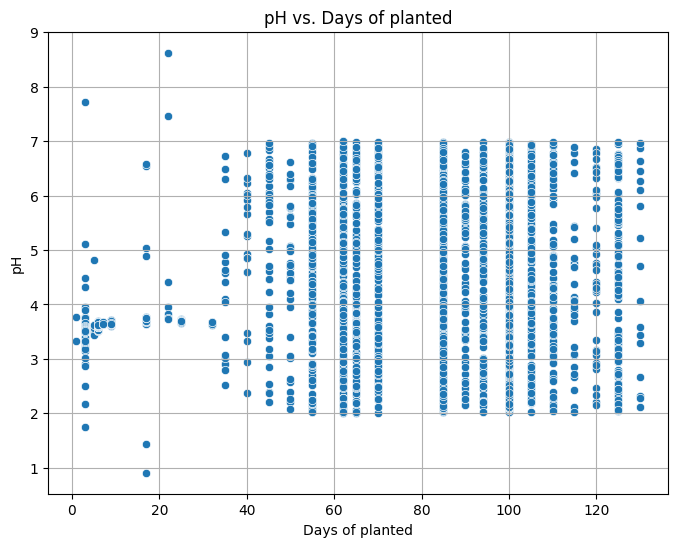

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Days of planted', y='pH')
plt.title('pH vs. Days of planted')
plt.xlabel('Days of planted')
plt.ylabel('pH')
plt.grid(True)
plt.show()

Apply L Bow method

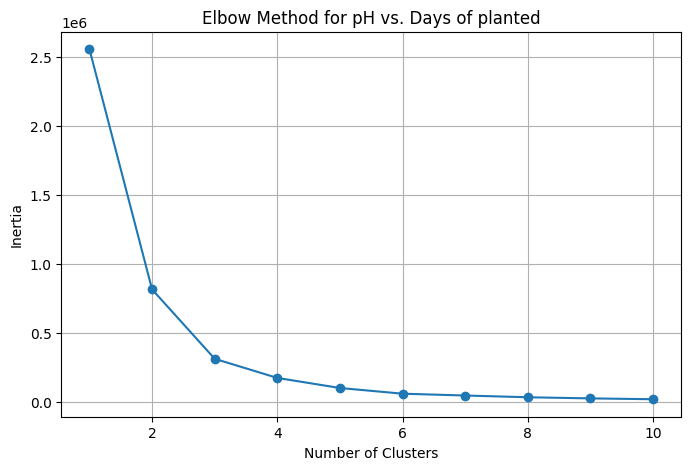

In [21]:
X = df[['Days of planted', 'pH']].dropna().values
max_clusters = 10
inertia = []

if len(X) > 0:
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for pH vs. Days of planted')
    plt.grid(True)
    plt.show()
else:
    plt.figure(figsize=(8, 5))
    plt.text(0.5, 0.5, "No data to cluster", horizontalalignment='center', verticalalignment='center')
    plt.title('Elbow Method for pH vs. Days of planted')
    plt.show()

Apply K Menas Clustering

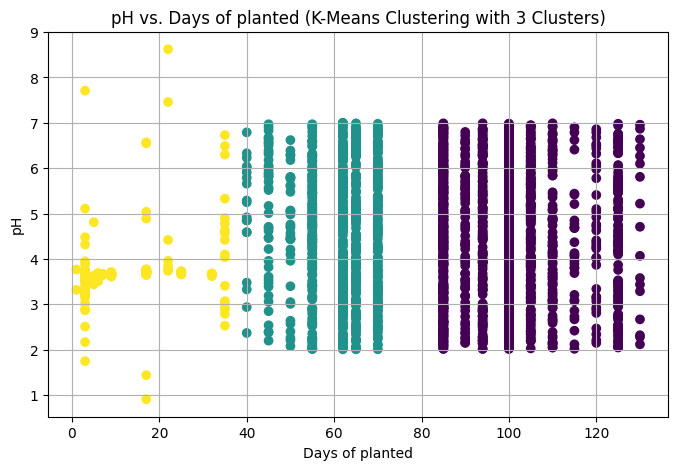

In [22]:
X = df[['Days of planted', 'pH']].dropna().values
n_clusters_ph = 3

if len(X) > 0:
    kmeans_ph = KMeans(n_clusters=n_clusters_ph, random_state=42, n_init=10)
    clusters_ph = kmeans_ph.fit_predict(X)

    cluster_col_name_ph = 'pH_DaysPlanted_KMeans_Cluster'

    temp_df = df[['Days of planted', 'pH']].dropna()

    temp_df[cluster_col_name_ph] = clusters_ph

    df = df.merge(temp_df[[cluster_col_name_ph]], left_index=True, right_index=True, how='left')


    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=clusters_ph, cmap='viridis')
    plt.xlabel('Days of planted')
    plt.ylabel('pH')
    plt.title(f'pH vs. Days of planted (K-Means Clustering with {n_clusters_ph} Clusters)')
    plt.grid(True)
    plt.show()
else:
    plt.figure(figsize=(8, 5))
    plt.text(0.5, 0.5, "No data to cluster", horizontalalignment='center', verticalalignment='center')
    plt.title('pH vs. Days of planted (K-Means Clustering)')
    plt.show()

pH_DaysPlanted_KMeans_Cluster with naming

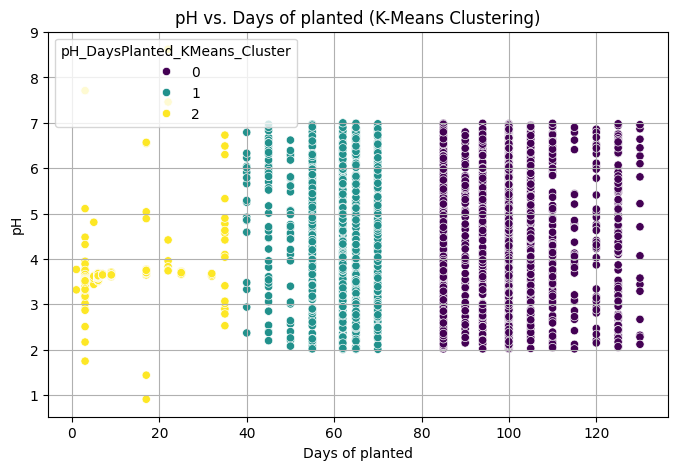

In [23]:
cluster_col_name_ph = 'pH_DaysPlanted_KMeans_Cluster'

if cluster_col_name_ph in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Days of planted', y='pH', hue=cluster_col_name_ph, palette='viridis')
    plt.title(f'pH vs. Days of planted (K-Means Clustering)')
    plt.xlabel('Days of planted')
    plt.ylabel('pH')
    plt.grid(True)
    plt.show()
else:
    print(f"Cluster column '{cluster_col_name_ph}' not found in the DataFrame.")

Descriptive statistics for clusters of 'pH' vs. 'Days of planted'

In [24]:
cluster_col_name_ph = 'pH_DaysPlanted_KMeans_Cluster'

if cluster_col_name_ph in df.columns:
    print(f"Descriptive statistics for clusters of 'pH' vs. 'Days of planted':")

    grouped_stats_ph = df.groupby(cluster_col_name_ph)[['Days of planted', 'pH']].agg(['mean', 'median', 'std'])

    display(grouped_stats_ph)
else:
    print(f"Cluster column '{cluster_col_name_ph}' not found in the DataFrame.")

Descriptive statistics for clusters of 'pH' vs. 'Days of planted':


Days of planted                          pH  \
                                         mean median        std      mean   
pH_DaysPlanted_KMeans_Cluster                                               
0                                   99.089315  100.0  11.361254  4.492466   
1                                   61.223582   62.0   7.311405  4.582937   
2                                   12.463768    9.0   9.631131  3.727618   

                                                
                              median       std  
pH_DaysPlanted_KMeans_Cluster                   
0                               4.54  1.431711  
1                               4.68  1.400359  
2                               3.66  0.714982

In [25]:

cluster_col_name_ph = 'pH_DaysPlanted_KMeans_Cluster'

if cluster_col_name_ph in df.columns:
    X = df[['Days of planted', 'pH']].dropna().values
    cluster_labels_ph = df[cluster_col_name_ph].dropna()

    if len(np.unique(cluster_labels_ph)) > 1 and len(X) > 1:
        silhouette_avg_ph = silhouette_score(X, cluster_labels_ph)
        print(f"Silhouette Score for pH vs. Days of planted clusters: {silhouette_avg_ph:.4f}")
    elif len(X) <= 1:
        print("Not enough data points to calculate Silhouette score.")
    else:
        print("Only one cluster found, cannot calculate Silhouette score.")
else:
    print(f"Cluster column '{cluster_col_name_ph}' not found in the DataFrame.")

Silhouette Score for pH vs. Days of planted clusters: 0.6862


Distribution of Crop Coefficient Stage within pH Clusters

Analyzing 'Crop Coefficient stage' distribution within pH clusters:


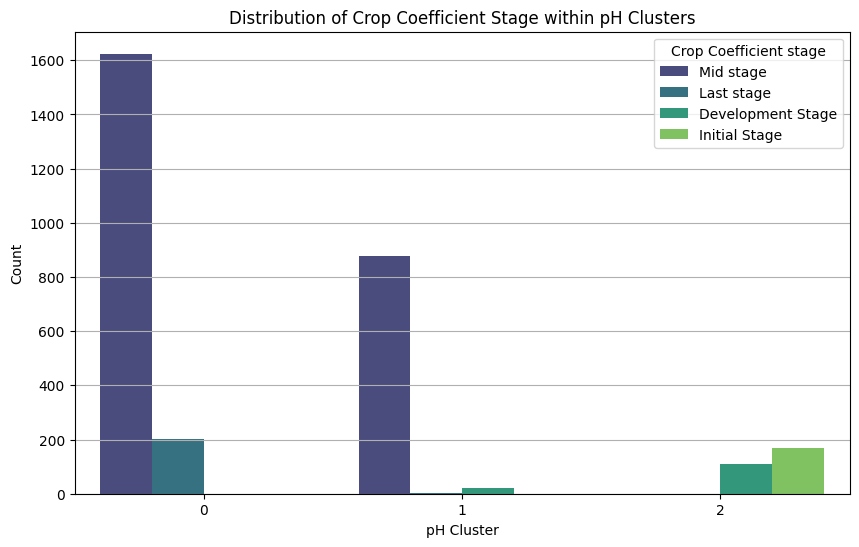

--------------------------------------------------


In [26]:
cluster_col_name_ph = 'pH_DaysPlanted_KMeans_Cluster'

if cluster_col_name_ph in df.columns and 'Crop Coefficient stage' in df.columns:
    print("Analyzing 'Crop Coefficient stage' distribution within pH clusters:")

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cluster_col_name_ph, hue='Crop Coefficient stage', palette='viridis')
    plt.title('Distribution of Crop Coefficient Stage within pH Clusters')
    plt.xlabel('pH Cluster')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

else:
    print(f"Required columns ('{cluster_col_name_ph}' or 'Crop Coefficient stage') not found in the DataFrame.")

print("-" * 50)

Analyzing trends for 'pH' across clusters:


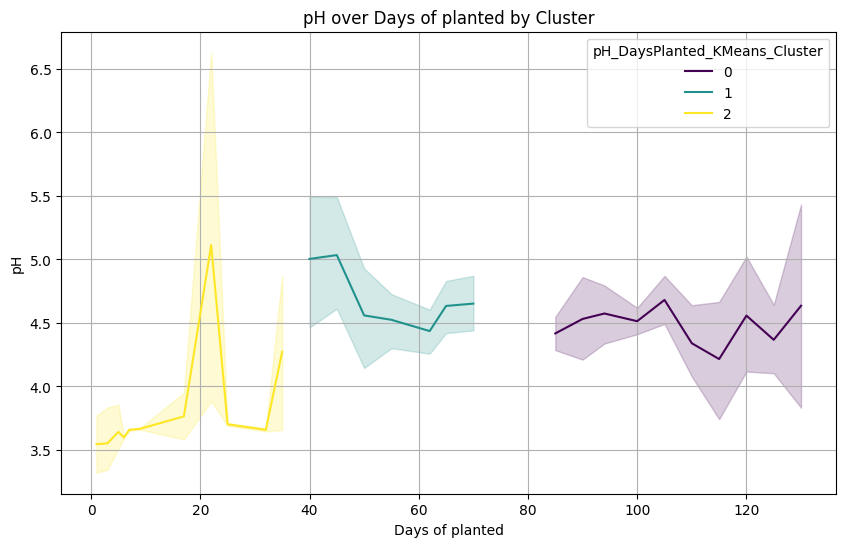

--------------------------------------------------


In [27]:
ph_cluster_col = 'pH_DaysPlanted_KMeans_Cluster'

if ph_cluster_col in df.columns:
    print(f"Analyzing trends for 'pH' across clusters:")

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Days of planted', y='pH', hue=ph_cluster_col, palette='viridis')
    plt.title(f'pH over Days of planted by Cluster')
    plt.xlabel('Days of planted')
    plt.ylabel('pH')
    plt.grid(True)
    plt.show()
else:
    print(f"Cluster column '{ph_cluster_col}' not found in the DataFrame.")

print("-" * 50)

Analyzing 'pH_DaysPlanted_KMeans_Cluster' distribution within 'Nitrogen [mg/kg]' clusters:
--------------------------------------------------
Analyzing 'pH_DaysPlanted_KMeans_Cluster' distribution within 'Phosphorus [mg/kg]' clusters:
--------------------------------------------------
Analyzing 'pH_DaysPlanted_KMeans_Cluster' distribution within 'Potassium' clusters:
--------------------------------------------------


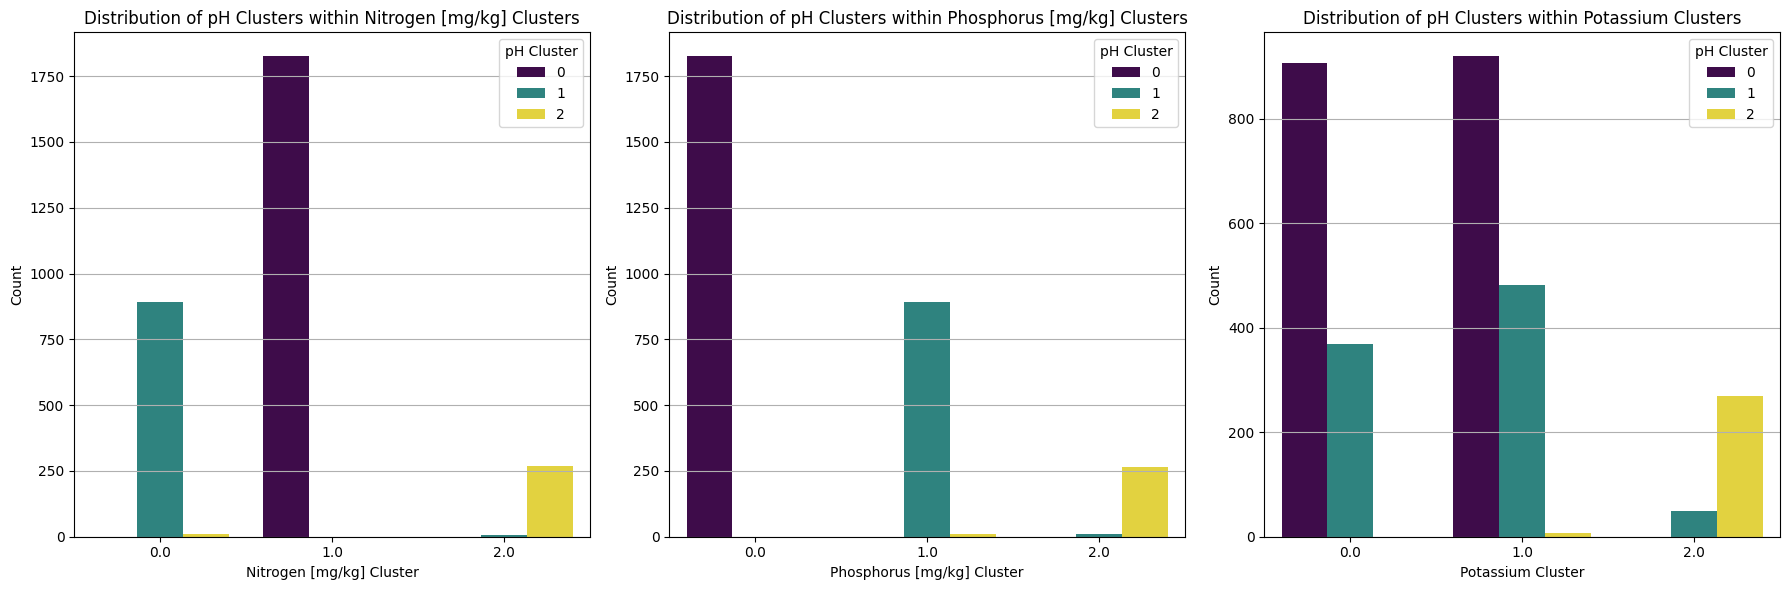

In [28]:

nutrient_cols = ['Nitrogen [mg/kg]', 'Phosphorus [mg/kg]', 'Potassium']
ph_cluster_col = 'pH_DaysPlanted_KMeans_Cluster'

if ph_cluster_col in df.columns:
    fig, axes = plt.subplots(1, len(nutrient_cols), figsize=(18, 6))

    for i, col in enumerate(nutrient_cols):
        nutrient_cluster_col = f'{col}_DaysPlanted_KMeans_Cluster'
        if nutrient_cluster_col in df.columns:
            print(f"Analyzing '{ph_cluster_col}' distribution within '{col}' clusters:")

            sns.countplot(data=df, x=nutrient_cluster_col, hue=ph_cluster_col, palette='viridis', ax=axes[i])
            axes[i].set_title(f'Distribution of pH Clusters within {col} Clusters')
            axes[i].set_xlabel(f'{col} Cluster')
            axes[i].set_ylabel('Count')
            axes[i].grid(axis='y')
            axes[i].legend(title='pH Cluster')
        else:
            print(f"Nutrient cluster column '{nutrient_cluster_col}' not found in the DataFrame.")
        print("-" * 50)

    plt.tight_layout()
    plt.show()

else:
    print(f"pH cluster column '{ph_cluster_col}' not found in the DataFrame.")